# Scraping weather forecase
In the following web scrapping, we used two methods that allowed us to easily analyze HTML pages and extract all kinds of data from the web.

### Exercice:

Scraping weather forecase from the The Weather Channel website `weather.com` using `requests` and `BeautifulSoup` libraries.

1. Implement a scraping script for getting 10 days weather forecasts of Benguerir city and Tanger City.
2. Store the data sets into Pandas DataFrame.
3. Use matplotlib library to plot the raining days of the two cities in the same figure. 

# Benguerir city

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import requests #get the HTML content from a web page
from urllib.request import urlopen #he urllib.request module is used to open URLs
from bs4 import BeautifulSoup #he Beautiful Soup package is used to extract data from html files. 'Version 4'

##### Specify the URL containing the dataset and pass it to urlopen() to get the html of the page.

In [8]:
url = "https://weather.com/fr-MA/temps/10jours/l/f37580e42d804f6d54467e56dd9f296e15fe9a25db53ddee63601416ecc06111"
html = urlopen(url)

###### The soup object allows  to extract interesting information about the weather in Benguerir  such as getting the title of the page as shown  the text of the webpage 

In [9]:
soup = BeautifulSoup(html, 'lxml')# Using  soup to parse the html 
#type(soup)

title = soup.title
#print(title)

<title data-react-helmet="true">Ben Guerir, Marrakech-Safi 10 jours de prévisions météo -The Weather Channel | Weather.com</title>


In [50]:
items = soup.find_all('h3', class_ = 'DetailsSummary--daypartName--kbngc')
dates = [item.get_text() for item in items]
items = soup.find_all('span', class_ = 'DetailsSummary--lowTempValue--2tesQ')
mins = [item.get_text() for item in items]
items = soup.find_all('span', class_ = 'DetailsSummary--highTempValue--3PjlX')
maxs = [item.get_text() for item in items]
items= soup.find_all('span', class_= 'DetailsSummary--extendedData--307Ax')
weathers = [item.get_text() for item in items]
items= soup.find_all('div', class_= 'DetailsSummary--precip--1a98O')
rains= [item.get_text() for item in items]
items = soup.find_all('span', class_ = 'Wind--windWrapper--3Ly7c undefined')
winds = [item.get_text() for item in items]

In [154]:
import pandas as pd
df1 = pd.DataFrame({'date': dates,
                  'max': maxs,
                  'min': mins,
                  'weather': weathers,
                  'rain': rains,
                  'wind': winds})
df1

,date,max,min,weather,rain,wind
0,Ce soir,--,11°,Très nuageux,Rain15%,SO 8 km/h
1,sam. 17,19°,8°,Peu nuageux,Rain15%,E 12 km/h
2,dim. 18,22°,8°,Peu nuageux,Rain15%,ESE 11 km/h
3,lun. 19,23°,7°,Plutôt ensoleillé,Rain7%,E 12 km/h
4,mar. 20,23°,7°,Peu nuageux,Rain7%,SSO 14 km/h
5,mer. 21,22°,7°,Ensoleillé,Rain7%,ENE 13 km/h
6,jeu. 22,21°,6°,Ensoleillé,Rain10%,ENE 13 km/h
7,ven. 23,22°,6°,Ensoleillé,Rain7%,SSO 13 km/h
8,sam. 24,21°,7°,Plutôt ensoleillé,Rain7%,S 13 km/h
9,dim. 25,21°,8°,Peu nuageux,Rain10%,SSE 15 km/h


# Tanger city

In [31]:
url2 = "https://weather.com/fr-MA/temps/10jours/l/701d5f2dd2a2b8cabcc505d69649a291257de6c1369a982396ea546ccb99198c"
html = urlopen(url2)

select the phase from which we want to extract information including the divs and the id concerned

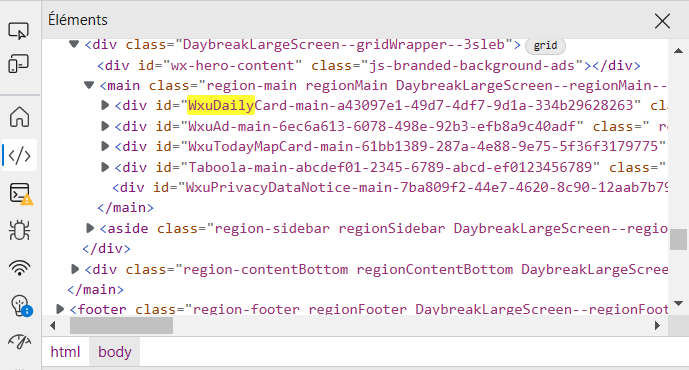

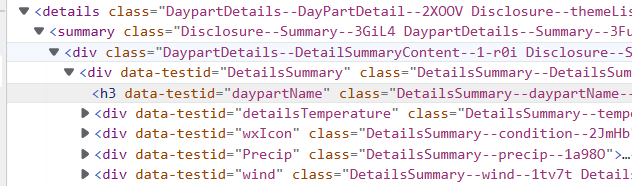

In [39]:
all_days = soup.find('div', id="WxuDailyCard-main-a43097e1-49d7-4df7-9d1a-334b29628263")
days = all_days.find_all('h3')
get_day = []
get_days = []
for day in days:
    temp = day.find('span')
    if  temp != None:
        if temp.get_text() not in get_day:
            get_day.append(temp.get_text())
get_days=get_day[0:15]

summaries= all_days.find_all('summary')

In [41]:
summaries = all_days.find_all('summary')
def get_day_info(summary):
    data = []
    for divs in summary.find('div').find_all('div'):
        spans = divs.find_all('span')
        for span in spans:
            data.append(span.get_text())

        break
    
    return data
data = [get_day_info(summar[day]) for day in range(15)]
df2 = pd.DataFrame(data=data)
df2.drop(1, axis=1, inplace=True)
df2 = pd.concat([pd.DataFrame(data=get_days), data2], axis=1)
columns = ['Days', 'max', 'min', 'Weathers', 'percentage', 'winds']
data2.columns = columns
data2

,Days,max,min,Weathers,percentage,winds
0,ven. 16,--,11°,Nuageux,3%,SO 6 km/h
1,sam. 17,19°,8°,Peu nuageux,15%,E 12 km/h
2,dim. 18,22°,8°,Peu nuageux,15%,ESE 11 km/h
3,lun. 19,23°,7°,Plutôt ensoleillé,7%,E 12 km/h
4,mar. 20,23°,7°,Peu nuageux,7%,SSO 14 km/h
5,mer. 21,22°,7°,Ensoleillé,7%,ENE 13 km/h
6,jeu. 22,21°,6°,Ensoleillé,10%,ENE 13 km/h
7,ven. 23,22°,6°,Ensoleillé,7%,SSO 13 km/h
8,sam. 24,21°,7°,Plutôt ensoleillé,7%,S 13 km/h
9,dim. 25,21°,8°,Peu nuageux,10%,SSE 15 km/h
